In [1]:
# 1. Load the data set and display its head.

import pandas as pd
melborne_df = pd.read_csv("D:\melborne_data.csv")
melborne_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


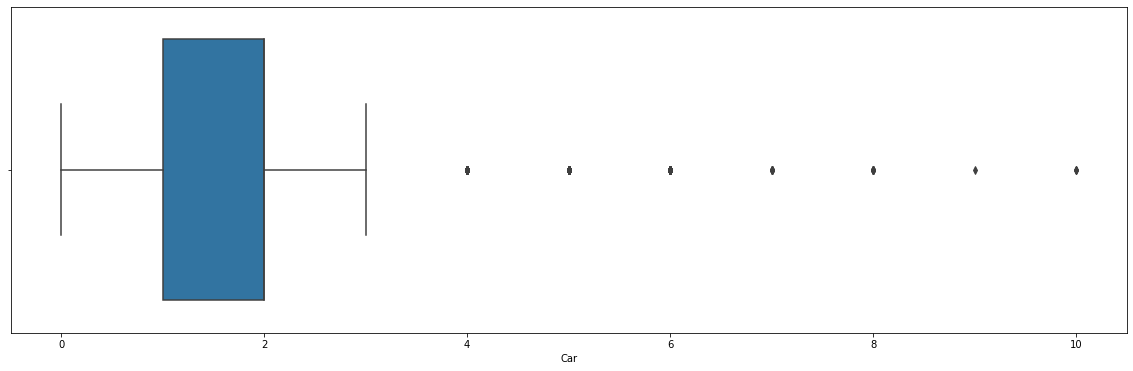

In [2]:
# 2. Check for outliers with respect to car parking. Plot the box-plot for the same.

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxplot(melborne_df['Car'])
plt.show ()

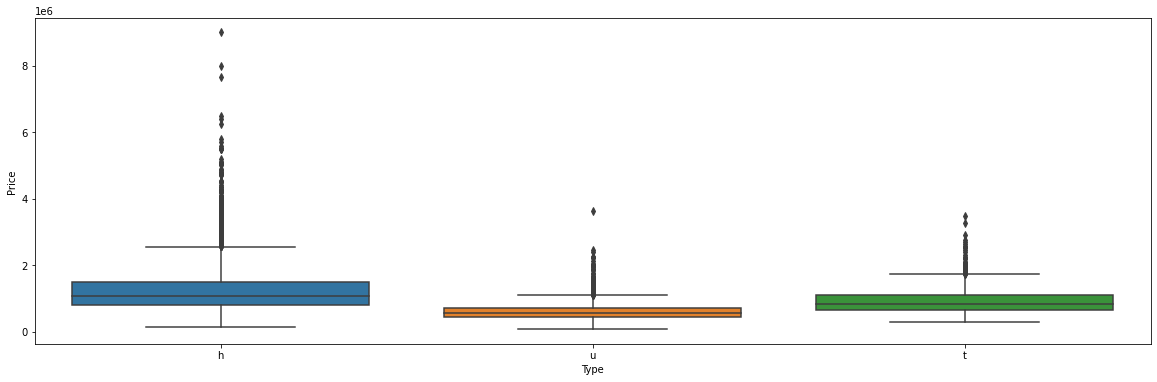

In [3]:
# 3. How are the outliers with respect to price with respect to its type. 

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
sns.boxplot(x='Type', y='Price', data=melborne_df)
plt.show ()

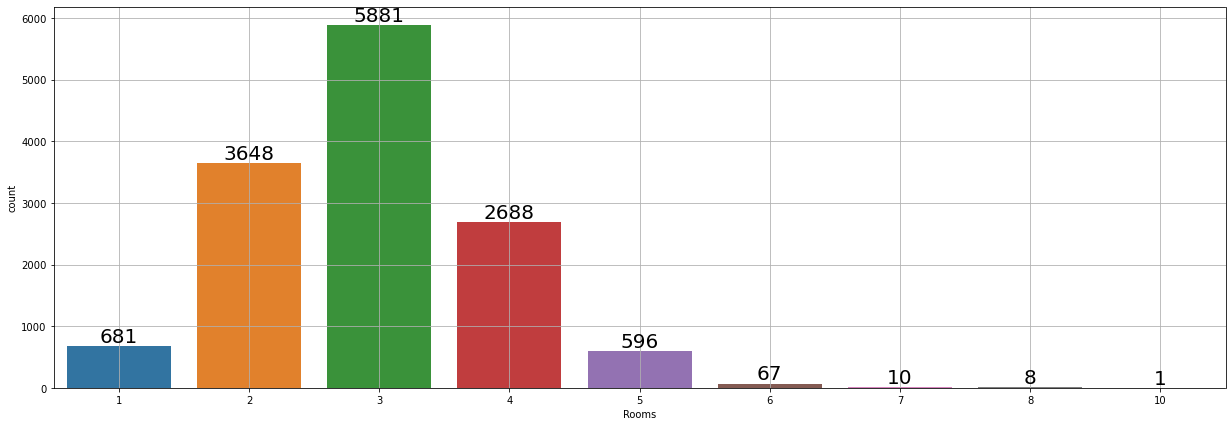

Maximum number of rooms in a house is : 10


In [4]:
# 4. What do you think is very high value of rooms in a house?

plt.figure(figsize=(21,7))
df = sns.countplot(x='Rooms', data=melborne_df,)
for p in df.patches:  
  df.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom', size = 20)
plt.grid()
plt.show()

# High value of rooms in,

print(f'Maximum number of rooms in a house is : {melborne_df["Rooms"].max()}')


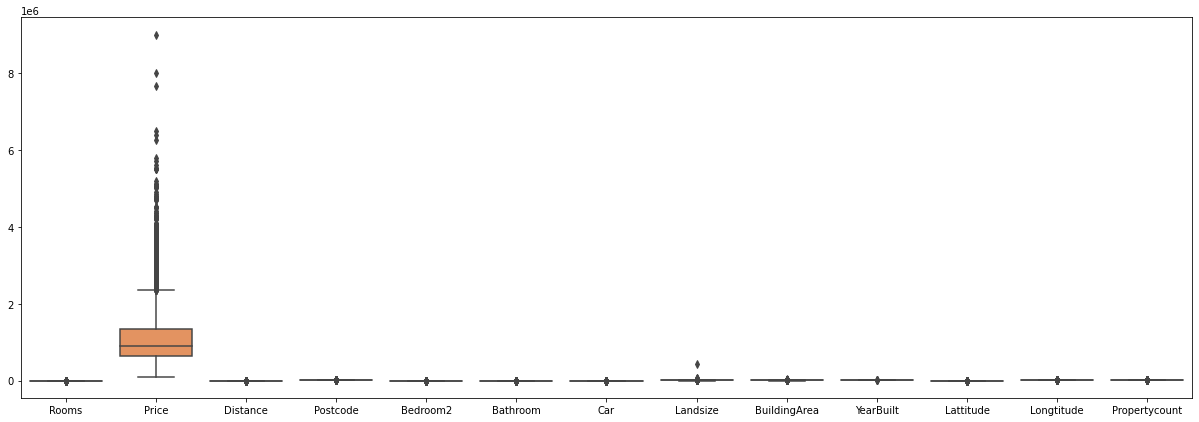

In [5]:
# 5. Plot a box plot with respect to all variables.

plt.figure(figsize=(21,7))
sns.boxplot( data=melborne_df)
plt.show()

The variable is : Rooms
The skweness for the variable is : 0.3764364470400018


<Figure size 432x288 with 0 Axes>

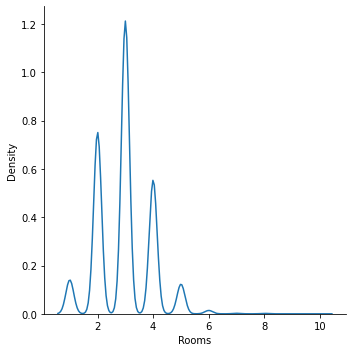

The variable is : Price
The skweness for the variable is : 2.2393769237559704


<Figure size 432x288 with 0 Axes>

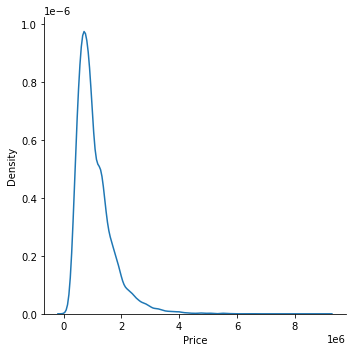

The variable is : Distance
The skweness for the variable is : 1.6767518487767612


<Figure size 432x288 with 0 Axes>

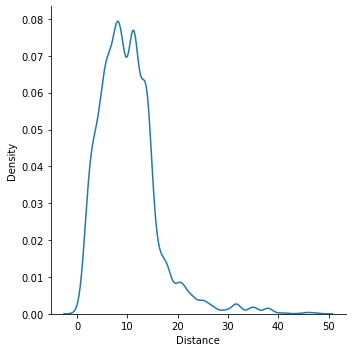

The variable is : Postcode
The skweness for the variable is : 4.07570196391326


<Figure size 432x288 with 0 Axes>

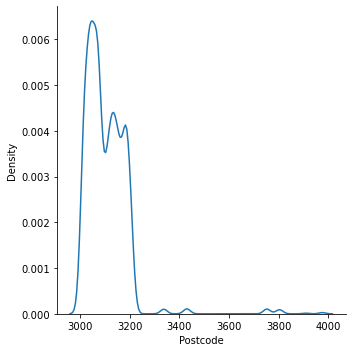

The variable is : Bedroom2
The skweness for the variable is : 0.7739967055545368


<Figure size 432x288 with 0 Axes>

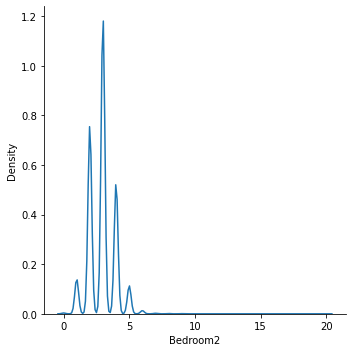

The variable is : Bathroom
The skweness for the variable is : 1.37725382352233


<Figure size 432x288 with 0 Axes>

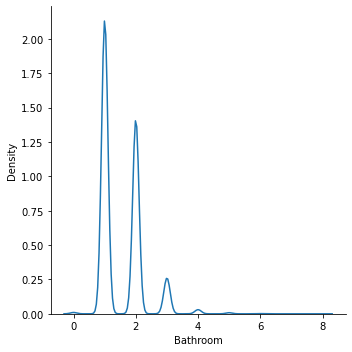

The variable is : Car
The skweness for the variable is : nan


<Figure size 432x288 with 0 Axes>

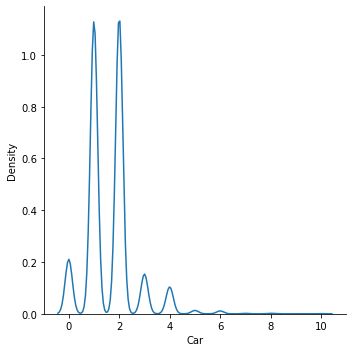

The variable is : Landsize
The skweness for the variable is : 95.2268805331916


<Figure size 432x288 with 0 Axes>

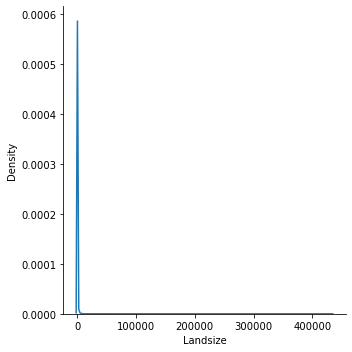

The variable is : BuildingArea
The skweness for the variable is : nan


<Figure size 432x288 with 0 Axes>

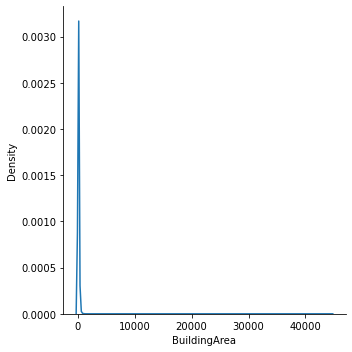

The variable is : YearBuilt
The skweness for the variable is : nan


<Figure size 432x288 with 0 Axes>

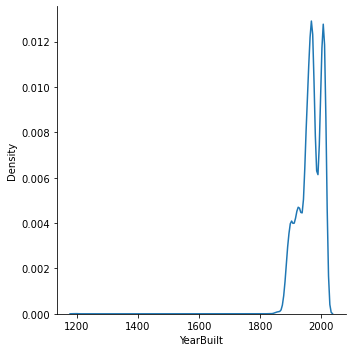

The variable is : Lattitude
The skweness for the variable is : -0.42664780159815474


<Figure size 432x288 with 0 Axes>

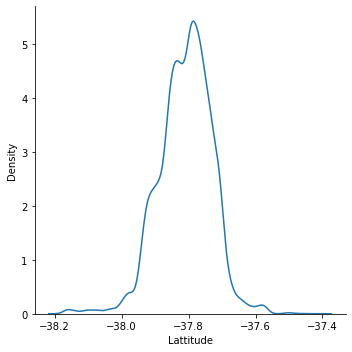

The variable is : Longtitude
The skweness for the variable is : -0.21096758939777033


<Figure size 432x288 with 0 Axes>

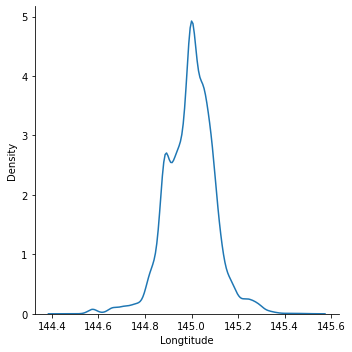

The variable is : Propertycount
The skweness for the variable is : 1.0692212294124601


<Figure size 432x288 with 0 Axes>

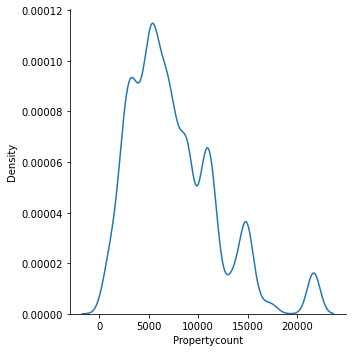

In [6]:
# 6.Plot skewness of the curve with respect to various variables

from scipy.stats import skew
Melbourne_df_skewness = melborne_df.select_dtypes(["int64","float64"])
for c in Melbourne_df_skewness:
    print(f'The variable is : {c}')
    print(f'The skweness for the variable is : {skew(Melbourne_df_skewness[c])}')
    plt.figure()
    sns.displot(Melbourne_df_skewness[c],kind='kde')
    plt.show()

In [7]:
# 7. Catogorise the houses into 3 catogories based on the distance. Near, Far and Very Far.

print(f'The minimun distance is : {melborne_df["Distance"].min()}')
print(f'The maximun distance is : {melborne_df["Distance"].max()}')

melborne_df['Distance_category'] = ' '
melborne_df.loc[(melborne_df['Distance'] >= 0) & (melborne_df['Distance'] <= 16), 'Distance_category'] = 'Near'
melborne_df.loc[(melborne_df['Distance'] > 16) & (melborne_df['Distance'] <= 36), 'Distance_category'] = 'Far'
melborne_df.loc[(melborne_df['Distance'] > 36) & (melborne_df['Distance'] <= 49), 'Distance_category'] = 'Very Far'
melborne_df['Distance_category']

The minimun distance is : 0.0
The maximun distance is : 48.1


0        Near
1        Near
2        Near
3        Near
4        Near
         ... 
13575     Far
13576    Near
13577    Near
13578    Near
13579    Near
Name: Distance_category, Length: 13580, dtype: object

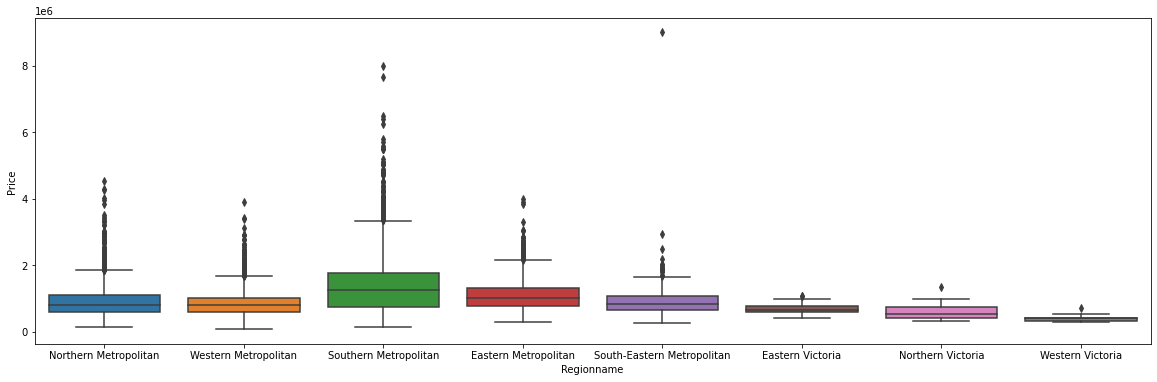

In [8]:
# 8. Compare the house price based on their location and draw a box plot to show the same. 

plt.figure(figsize=(20,6))
sns.boxplot(x='Regionname', y='Price', data=melborne_df)
plt.show()

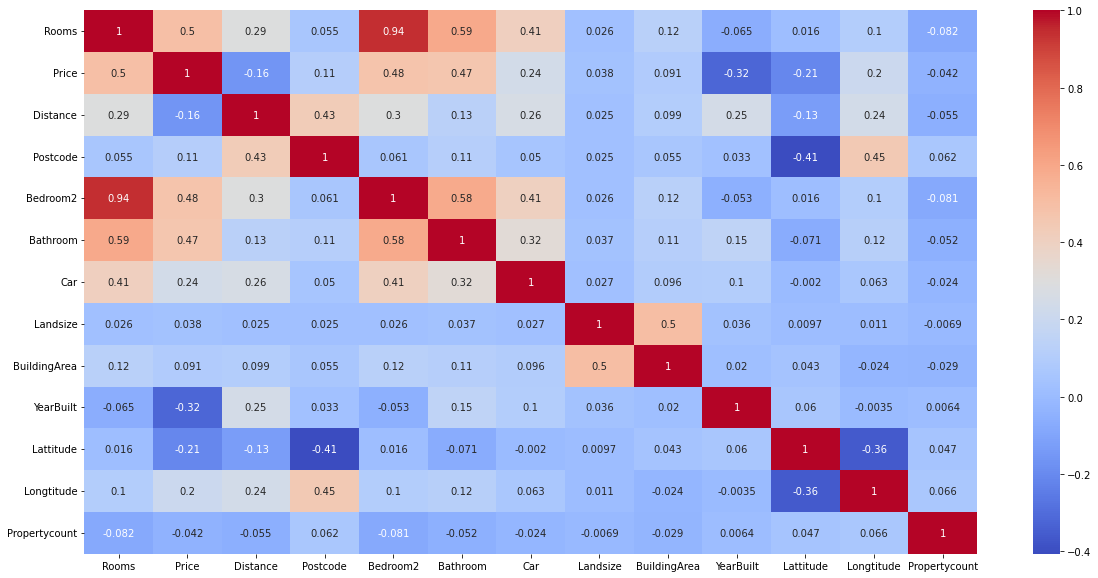

In [9]:
#9. Find the correlation between the price and the other variables.

plt.figure(figsize = (20,10))
sns.heatmap(melborne_df.corr(),fmt='.2g',cmap= 'coolwarm', annot=True,)
plt.show()

land area and Rooms
Linear regression coefficient: [[6.14985325e-06]]
Linear Regression intercept: [2.93456288]


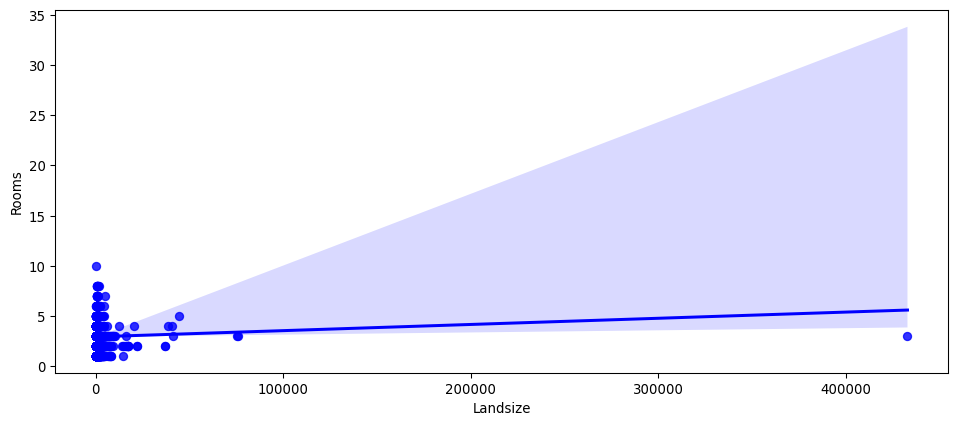

land area and price
Linear regression coefficient: [[6.14985325e-06]]
Linear Regression intercept: [2.93456288]


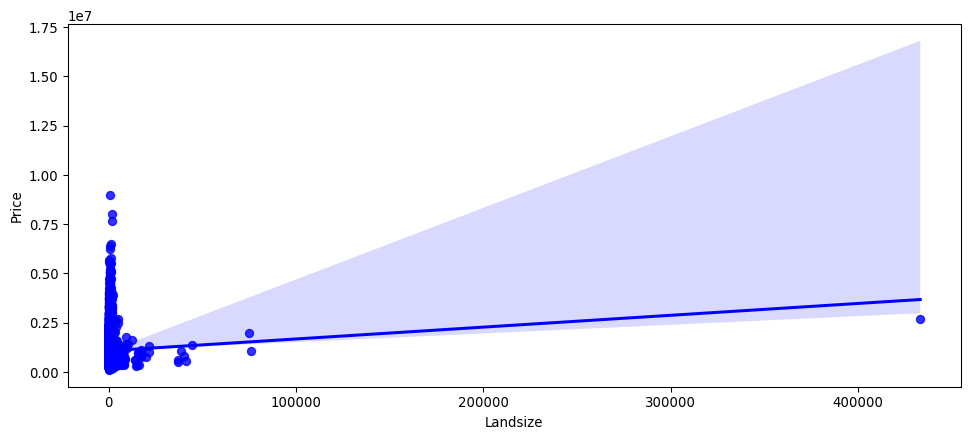

land area and car
Linear regression coefficient: [[6.14985325e-06]]
Linear Regression intercept: [2.93456288]


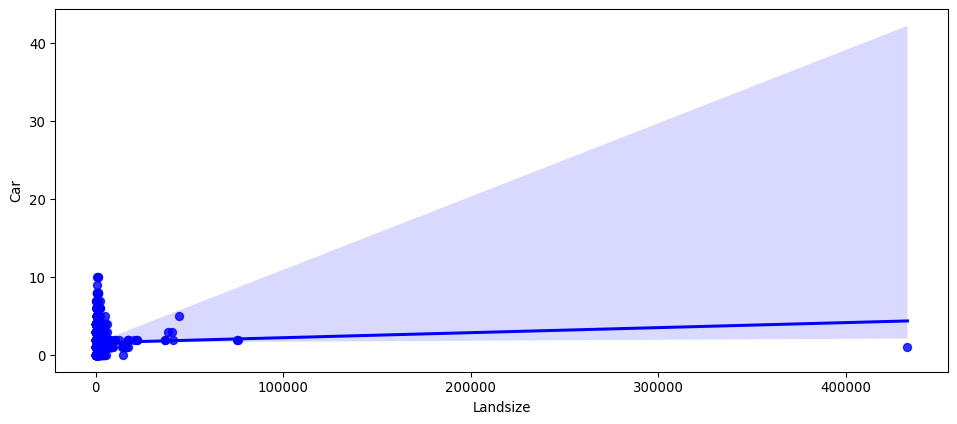

In [10]:
#10. Fit a regression line for (a) car parking and land area of the house (b) land area and number of rooms (c) land area and price. 

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

print('land area and Rooms')

x=Melbourne_df_skewness['Landsize']
y=Melbourne_df_skewness['Rooms']
x_reshaped= x.values.reshape(-1,1)
y_reshaped = y.values.reshape(-1,1)
lin_reg.fit(x_reshaped,y_reshaped)
print("Linear regression coefficient:",lin_reg.coef_)
print("Linear Regression intercept:",lin_reg.intercept_)
plt.figure(figsize=(12,5), dpi=96)
sns.regplot(x='Landsize', y='Rooms', data=Melbourne_df_skewness, color='blue')
plt.xlabel('Landsize')
plt.ylabel('Rooms')
plt.show()

print('land area and price')

x1=Melbourne_df_skewness['Landsize']
y1=Melbourne_df_skewness['Price']
x1_reshaped= x.values.reshape(-1,1)
y1_reshaped = y.values.reshape(-1,1)
lin_reg.fit(x1_reshaped,y1_reshaped)
print("Linear regression coefficient:",lin_reg.coef_)
print("Linear Regression intercept:",lin_reg.intercept_)
plt.figure(figsize=(12,5), dpi=96)
sns.regplot(x='Landsize', y='Price', data=Melbourne_df_skewness, color='blue')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

print('land area and car')

x1=Melbourne_df_skewness['Landsize']
y1=Melbourne_df_skewness['Car']
x1_reshaped= x.values.reshape(-1,1)
y1_reshaped = y.values.reshape(-1,1)
lin_reg.fit(x1_reshaped,y1_reshaped)
print("Linear regression coefficient:",lin_reg.coef_)
print("Linear Regression intercept:",lin_reg.intercept_)
plt.figure(figsize=(12,5), dpi=96)
sns.regplot(x='Landsize', y='Car', data=Melbourne_df_skewness, color='blue')
plt.xlabel('Landsize')
plt.ylabel('Car')
plt.show()

In [11]:
# 11. Who are the top 3 sellers in real estate.

melborne_df['SellerG'].value_counts().head(3)

Nelson           1565
Jellis           1316
hockingstuart    1167
Name: SellerG, dtype: int64

In [12]:
# 12. Based on the distance catogories that you have created in questioins number 7, Check for the dominance of each of the sellers. 

chi_crosstab_seller=pd.crosstab(melborne_df['SellerG'],melborne_df['Distance_category'])
print("Chi-Square contingency table:\n",chi_crosstab_seller)

colTotals_ = chi_crosstab_seller.sum()
rowTotals_ = chi_crosstab_seller.sum(axis=1)
N = rowTotals_.sum()


nCols_ = len(colTotals_)
nRows_ = len(rowTotals_)

chiVal_ = 0
for i in range(nRows_):
    for j in range(nCols_):
        E = rowTotals_[i] * colTotals_[j] / N
        O = chi_crosstab_seller.iloc[i,j]
        chiVal_ = chiVal_ + (O - E)**2 / E
print("Chi2 Value:",chiVal_)

Chi-Square contingency table:
 Distance_category      Far  Near  Very Far
SellerG                                   
@Realty                  2     0         0
ASL                      0     4         0
Abercromby's             0    21         0
Ace                      0     2         0
Alexkarbon               0    40         0
...                    ...   ...       ...
hockingstuart/Village    0     1         0
iOne                     0     1         0
iProperty                1     0         0
iSell                   11     0         0
iTRAK                   12     1         0

[268 rows x 3 columns]
Chi2 Value: 6187.55568512566


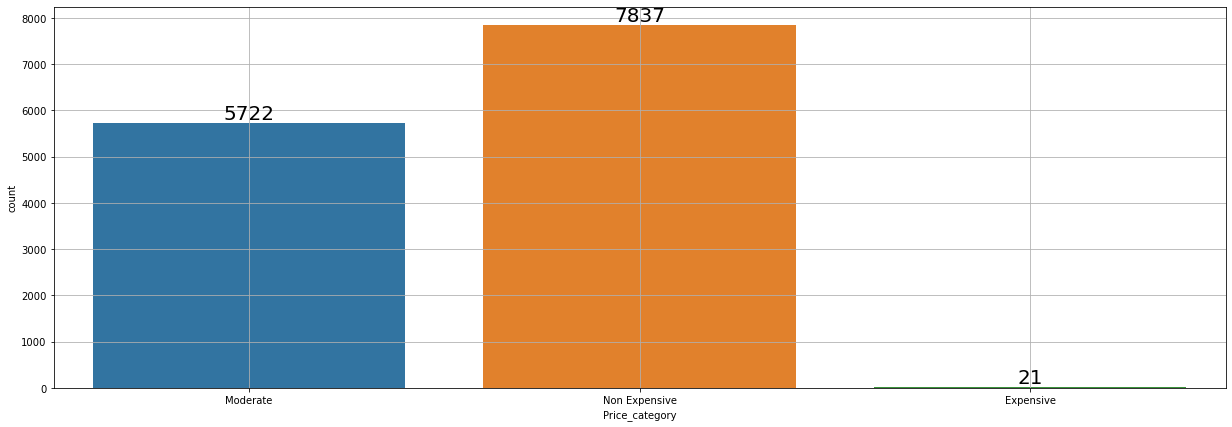

In [13]:
#13. Catogorise the houses into 3 catogories based on the price. Non expensive, moderate and Expensive. 

melborne_df['Price_category'] = ' '
melborne_df.loc[(melborne_df['Price'] >= 85000) & (melborne_df['Price'] <= 1000000), 'Price_category'] = 'Non Expensive'
melborne_df.loc[(melborne_df['Price'] > 1000000) & (melborne_df['Price'] <= 5000000), 'Price_category'] = 'Moderate'
melborne_df.loc[(melborne_df['Price'] > 5000000) & (melborne_df['Price'] <= 9000000), 'Price_category'] = 'Expensive'
melborne_df.head(30)
#plotting in countplot
plt.figure(figsize=(21,7))
dff = sns.countplot(x='Price_category', data=melborne_df)
for p in dff.patches:  
  dff.annotate(p.get_height(), xy = (int(p.get_width()/2 + p.get_x()), p.get_height()), ha = 'center', va = 'bottom', size = 20)
plt.grid()
plt.show() 

In [14]:
#14. Which is the most prefered method for selling houses in each of the suburb. Construct a chi square contingency table for all sururb and 3 catogories we have consturcted in question 13. Use unique command in python to get a list of unique names of suburb. 

chi_crosstab=pd.crosstab(melborne_df['Suburb'],melborne_df['Price_category'])
print("Chi-Square contingency table:\n",chi_crosstab)

Chi-Square contingency table:
 Price_category  Expensive  Moderate  Non Expensive
Suburb                                            
Abbotsford              0        33             23
Aberfeldie              0        30             14
Airport West            0         5             62
Albanvale               0         0              6
Albert Park             0        63              6
...                   ...       ...            ...
Wonga Park              0         0              1
Wyndham Vale            0         0              4
Yallambie               0         3             21
Yarra Glen              0         0              1
Yarraville              0        68             96

[314 rows x 3 columns]


In [15]:
#15. From the table above compare for homogenity between all suburbs with respect to different category of houses. )

colTotals = chi_crosstab.sum()
rowTotals = chi_crosstab.sum(axis=1)
N = rowTotals.sum()


nCols = len(colTotals)
nRows = len(rowTotals)

chiVal = 0
for i in range(nRows):
    for j in range(nCols):
        E = rowTotals[i] * colTotals[j] / N
        O = chi_crosstab.iloc[i,j]
        chiVal = chiVal + (O - E)**2 / E
print("Chi2 Value:",chiVal)

Chi2 Value: 4397.66601658739
